In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
# Step 1: Create more complicated dataset
X, y_true = make_blobs(n_samples=400, centers=6, cluster_std=3, random_state=42)


C:\Users\rohit\AppData\Local\Temp\ipykernel_7172\1993148948.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


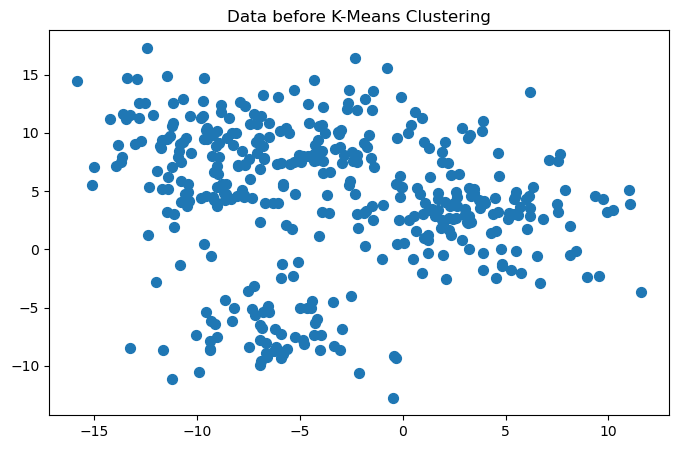

In [3]:
# Step 2: Visualize the data before clustering
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title("Data before K-Means Clustering")
plt.show()

In [4]:
# Step 3: K-Means Algorithm from Scratch with Visualization
def plot_kmeans_progress(X, centroids, labels, iteration, prev_centroids=None):
    """ Function to plot the progress of KMeans clustering """
    plt.figure(figsize=(8, 5))
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label="Centroids")
    
    # Plot previous centroids with dashed lines (to show movement)
    if prev_centroids is not None:
        for i in range(centroids.shape[0]):
            plt.plot([prev_centroids[i, 0], centroids[i, 0]], 
                     [prev_centroids[i, 1], centroids[i, 1]], 'r--', lw=2)
    
    plt.title(f"K-Means Iteration {iteration}")
    plt.legend()
    plt.show()

def initialize_centroids(X, k):
    """ Initialize centroids randomly from the dataset """
    random_idx = np.random.permutation(X.shape[0])
    centroids = X[random_idx[:k]]
    return centroids

def assign_clusters(X, centroids):
    """ Assign points to the closest centroid """
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def update_centroids(X, labels, k):
    """ Recompute centroids as the mean of assigned points """
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

In [5]:
# Step 4: Initialize centroids and parameters
k = 6  # Number of clusters
centroids = initialize_centroids(X, k)
labels = np.zeros(X.shape[0])
iterations = 5  # Number of iterations


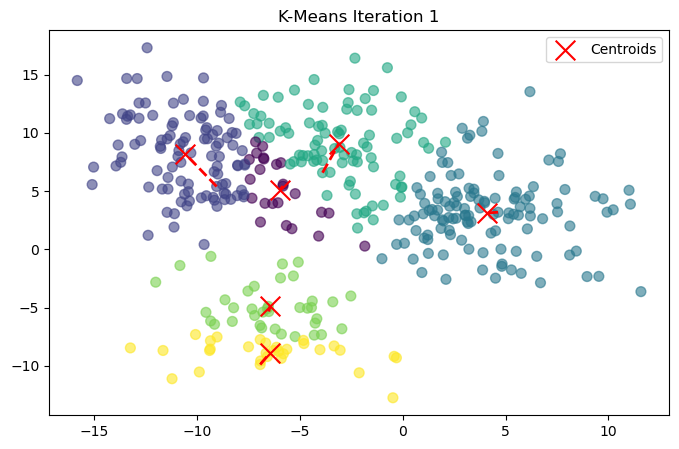

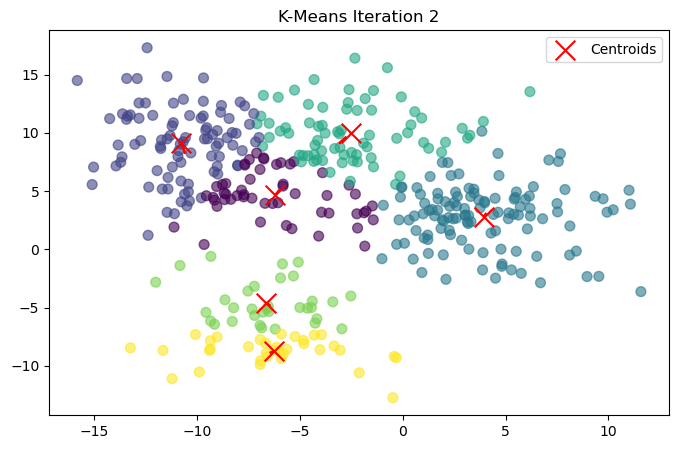

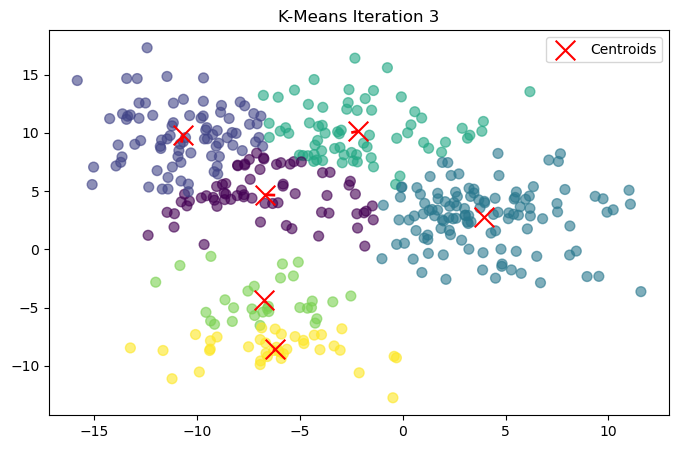

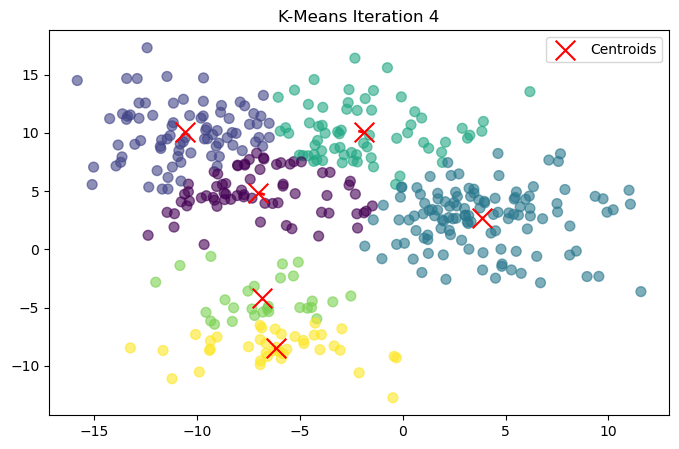

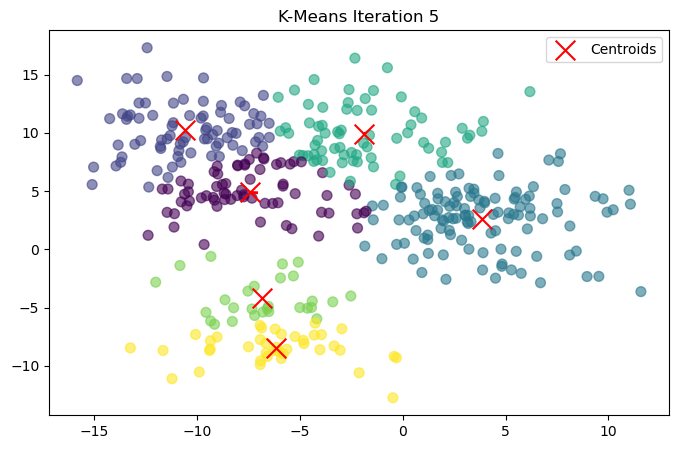

In [6]:
# Step 5: Perform K-Means clustering and visualize centroid movements
for i in range(iterations):
    prev_centroids = centroids.copy()  # Keep track of centroids from the previous iteration
    labels = assign_clusters(X, centroids)  # Step 1: Assign clusters
    centroids = update_centroids(X, labels, k)  # Step 2: Update centroids

    # Plot the progress at each iteration
    plot_kmeans_progress(X, centroids, labels, iteration=i+1, prev_centroids=prev_centroids)
